1. Перші 8 рядків:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414

3. Імена стовпців:
Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

6. Кількість унікальних жіночих імен: 64911
Кількість унікальних чоловічих імен: 39199

7. 5 найпопулярніших чоловічих імен у 2010 році:
            Name  Count
1677392    Jacob  22082
1677393    Ethan  17985
1677394  Michael  17308
1677395   Jayden  17152
1677396  William  17030

8. Найпопулярніше ім'я за всі роки:
Id        431053
Name       Linda
Year        1947
Gender         F
Count      99680
Name: 431052, dtype: object

12. Найпопулярніше ім'я у році з найбільшою кількістю унікальних імен:
              Id   Name  Year Gender  Count
1608302  160830

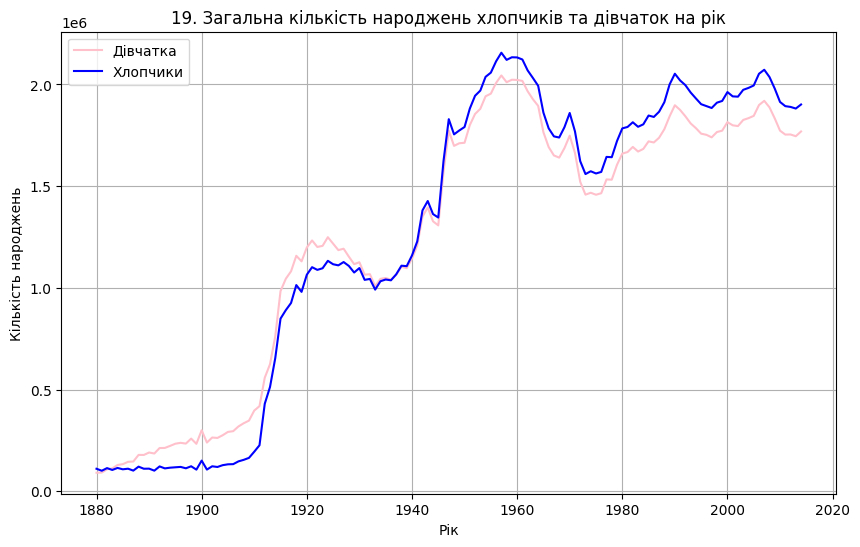


20. Кількість гендерно-нейтральних імен: 1

24. Найпопулярніше серед непопулярних імен: Celester


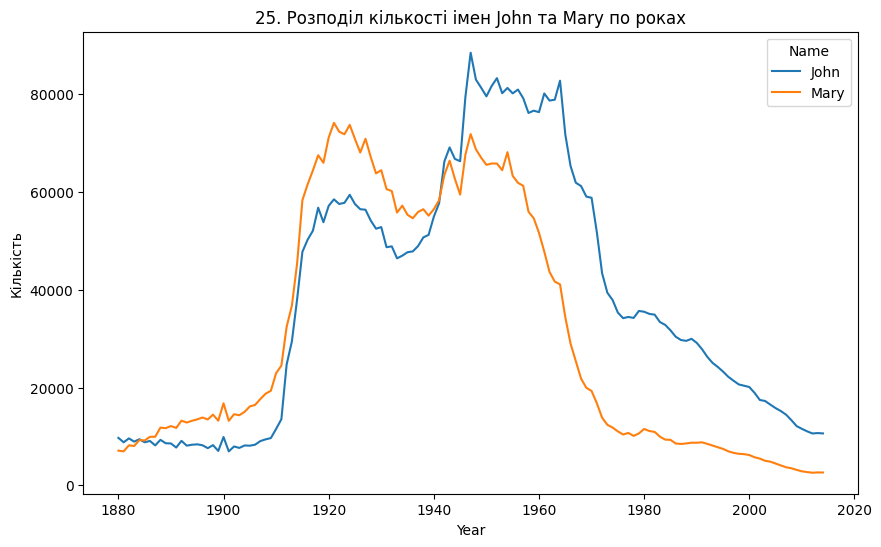

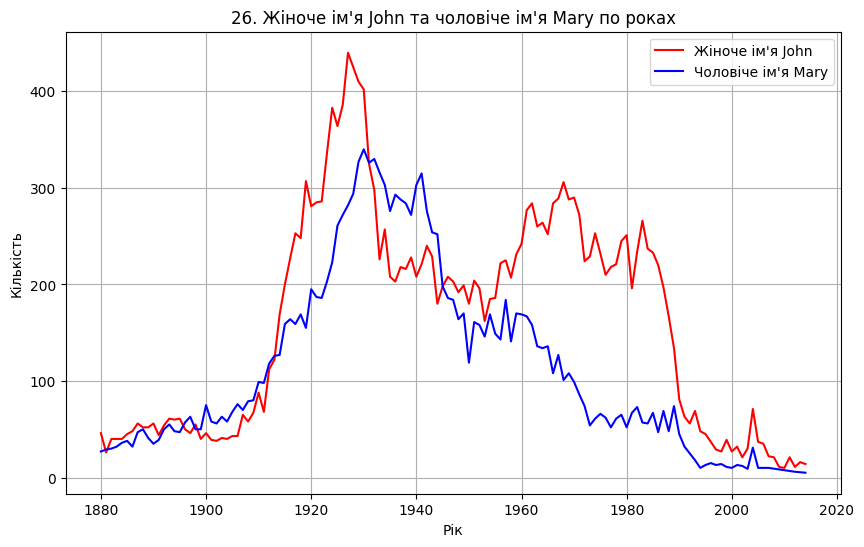


27. Найпопулярніші імена у кожному році:
         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "NationalNames.csv"
data = pd.read_csv(file_path)

print("1. Перші 8 рядків:")
print(data.head(8))

print("\n3. Імена стовпців:")
print(data.columns)

unique_female_names = data[data['Gender'] == 'F']['Name'].nunique()
unique_male_names = data[data['Gender'] == 'M']['Name'].nunique()
print("\n6. Кількість унікальних жіночих імен:", unique_female_names)
print("Кількість унікальних чоловічих імен:", unique_male_names)

top_male_2010 = data[(data['Year'] == 2010) & (data['Gender'] == 'M')].nlargest(5, 'Count')
print("\n7. 5 найпопулярніших чоловічих імен у 2010 році:")
print(top_male_2010[['Name', 'Count']])

max_name = data.loc[data['Count'].idxmax()]
print("\n8. Найпопулярніше ім'я за всі роки:")
print(max_name)

unique_names_per_year = data.groupby('Year')['Name'].nunique()
year_most_unique = unique_names_per_year.idxmax()
most_popular_in_year = data[data['Year'] == year_most_unique].nlargest(1, 'Count')
print("\n12. Найпопулярніше ім'я у році з найбільшою кількістю унікальних імен:")
print(most_popular_in_year)

jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
if not jacob_female.empty:
    year_jacob_female = jacob_female.loc[jacob_female['Count'].idxmax(), 'Year']
    print("\n13. Рік, коли ім'я 'Jacob' було найпопулярнішим серед жіночих імен:", year_jacob_female)
else:
    print("\n13. Ім'я 'Jacob' серед жіночих імен не зустрічається.")

gender_neutral = data.groupby(['Year', 'Name'])['Gender'].nunique()
neutral_counts = gender_neutral[gender_neutral == 2].reset_index().groupby('Year')['Name'].count()
year_max_neutral = neutral_counts.idxmax()
print("\n14. Рік із найбільшою кількістю гендерно-нейтральних імен:", year_max_neutral)

births_per_year = data.groupby('Year')['Count'].sum()
print("\n15. Загальна кількість народжень за рік:")
print(births_per_year)

year_max_births = births_per_year.idxmax()
print("\n16. Рік із найбільшою кількістю народжень:", year_max_births)

births_by_gender = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print("\n17. Кількість дівчаток та хлопчиків кожного року:")
print(births_by_gender)

plt.figure(figsize=(10, 6))
plt.plot(births_by_gender.index, births_by_gender['F'], label='Дівчатка', color='pink')
plt.plot(births_by_gender.index, births_by_gender['M'], label='Хлопчики', color='blue')
plt.title("19. Загальна кількість народжень хлопчиків та дівчаток на рік")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend()
plt.grid()
plt.show()

total_neutral_names = gender_neutral[gender_neutral == 2].nunique()
print("\n20. Кількість гендерно-нейтральних імен:", total_neutral_names)

min_count = data['Count'].min()
least_popular_names = data[data['Count'] == min_count]
most_frequent_least_popular = least_popular_names['Name'].value_counts().idxmax()
print("\n24. Найпопулярніше серед непопулярних імен:", most_frequent_least_popular)

john_mary = data[data['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()
john_mary.plot(figsize=(10, 6), title="25. Розподіл кількості імен John та Mary по роках")
plt.ylabel("Кількість")
plt.show()

john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')]
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')]

plt.figure(figsize=(10, 6))
plt.plot(john_female['Year'], john_female['Count'], label="Жіноче ім'я John", color='red')
plt.plot(mary_male['Year'], mary_male['Count'], label="Чоловіче ім'я Mary", color='blue')
plt.title("26. Жіноче ім'я John та чоловіче ім'я Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend()
plt.grid()
plt.show()

popular_names_per_year = data.loc[data.groupby('Year')['Count'].idxmax()]
print("\n27. Найпопулярніші імена у кожному році:")
print(popular_names_per_year[['Year', 'Name', 'Count']])